In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline

In [2]:
data1 = pd.read_excel("output_x_1e-3.xlsx",sheet_name=0)
data2 = pd.read_excel("output_x_1e-2.xlsx",sheet_name=0)
data3 = pd.read_excel("output_x_2e-2.xlsx",sheet_name=0)
data = [data1, data2, data3]

In [3]:
data[0].head()

,c,p_u,on_demand_u,off_demand_u,pi_u,pon,poff,on_demand_d,show_demand_d,off_demand_d,pi_d
0,0.1000,0.4000,0.0,0.4000,0.040000,0.3525,0.4000,0.0,0,0.4000,0.040000
1,0.1025,0.3975,0.0,0.3975,0.039502,0.3500,0.3975,0.0,0,0.3975,0.039502
2,0.1050,0.3950,0.0,0.3950,0.039006,0.3475,0.3950,0.0,0,0.3950,0.039006
3,0.1075,0.3925,0.0,0.3925,0.038514,0.3450,0.3925,0.0,0,0.3925,0.038514
4,0.1100,0.3900,0.0,0.3900,0.038025,0.3425,0.3900,0.0,0,0.3900,0.038025


In [18]:
def find_HPLP_ind(HPLP_c):
    first = 0
    last = 0
    last_val= 0 
    for ind, val in enumerate(HPLP_c.values):
        #print(ind)
        if (first==0) & (val==True):
            first = ind
            #print("find first:", first)
        if (val==False) & (last_val==True):
            last = ind
            #print("find last:", last )
            break
        last_val = val
        
    return first, last-1

In [23]:

def plot(data,xs, fz=(20,8)):
    epsilon = 0.0000001
    fig,axes = plt.subplots(2, len(data),sharex='col', sharey='row',figsize=fz)
    fig.subplots_adjust(hspace=0.6, wspace=0.4)
    for j,current_data  in enumerate(data):
        sel_c = current_data["c"]
        min_c_ind = min(sel_c)
        max_c_ind = max(sel_c)
        step = sel_c[1]-sel_c[0]

        sel_prices_u = current_data["p_u"]
        sel_prices_d_on =  current_data["pon"]
        sel_prices_d_off =  current_data["poff"]
        
        sel_profits_u = current_data["pi_u"]
        sel_profits_d = current_data["pi_d"]
        
        HPLP_zone=(sel_prices_u - sel_prices_d_on < epsilon) & (sel_profits_u -sel_profits_d>epsilon)
        HPLP_c = sel_c[current_data[HPLP_zone].index]
       # print(HPLP_c)
        if not HPLP_c.empty:
            HPLP_zone_min, HPLP_zone_max = find_HPLP_ind(HPLP_zone)
            HPLP_c_min = HPLP_c.loc[HPLP_zone_min]
            HPLP_c_max = HPLP_c.loc[HPLP_zone_max]
            


        axes[0,j].scatter(sel_c, sel_prices_u,  marker='*', s=50, facecolors='none', edgecolors='r',label="Uniform price")
        axes[0,j].scatter(sel_c, sel_prices_d_on, marker=".",s=50,facecolors='none', edgecolors='b',label="Dual online price")
        axes[0,j].scatter(sel_c, sel_prices_d_off, marker= "+", s=50, edgecolors='g',label="Dual offline price")
        
        if not HPLP_c.empty:
            axes[0,j].axvspan(HPLP_c_min, HPLP_c_max, alpha=0.5, facecolor='none',edgecolor='black',linestyle='--')

        if j==len(data)-1:
            axes[0,j].legend(prop=dict(size=18), frameon=True)


        #axes[0,j].set_xlabel("c", fontsize =16)

        axes[0,j].set_title(r"$x$={} ".format(xs[j]), fontsize=22)
        #axes[0,j].set_xlim((0.1,0.17))
        #axes[0,j].set_ylim((0.28,0.46))
        
        for label in (axes[0,j].get_xticklabels() + axes[0,j].get_yticklabels()):
            label.set_fontsize(16)

        axes[1,j].scatter(sel_c, sel_profits_u, marker='*', s=50, facecolors='none', edgecolors='r',label="Uniform pricing")
        axes[1,j].scatter(sel_c, sel_profits_d, marker=".",s=50,facecolors='none', edgecolors='b',label="Dual pricing")

        if not HPLP_c.empty:
            axes[1,j].axvspan(HPLP_c_min, HPLP_c_max, alpha=0.5, facecolor='none',edgecolor='black',linestyle='--')
        
        if j==len(data) -1:
            axes[1,j].legend(prop=dict(size=18), frameon=True)
            
        #axes[1,j].set_ylim((0.03,0.042))
        #axes[1,j].set_xlim((0.1,0.17))
        
        for label in (axes[1,j].get_xticklabels() + axes[1,j].get_yticklabels()):
            label.set_fontsize(16)
    axes[0,0].set_ylabel("Prices", fontsize =22)
    axes[1,0].set_ylabel("Profits", fontsize =22)
    fig.text(0.5, 0, 'c', ha='center',fontsize =22)
    fig.tight_layout()
    return fig

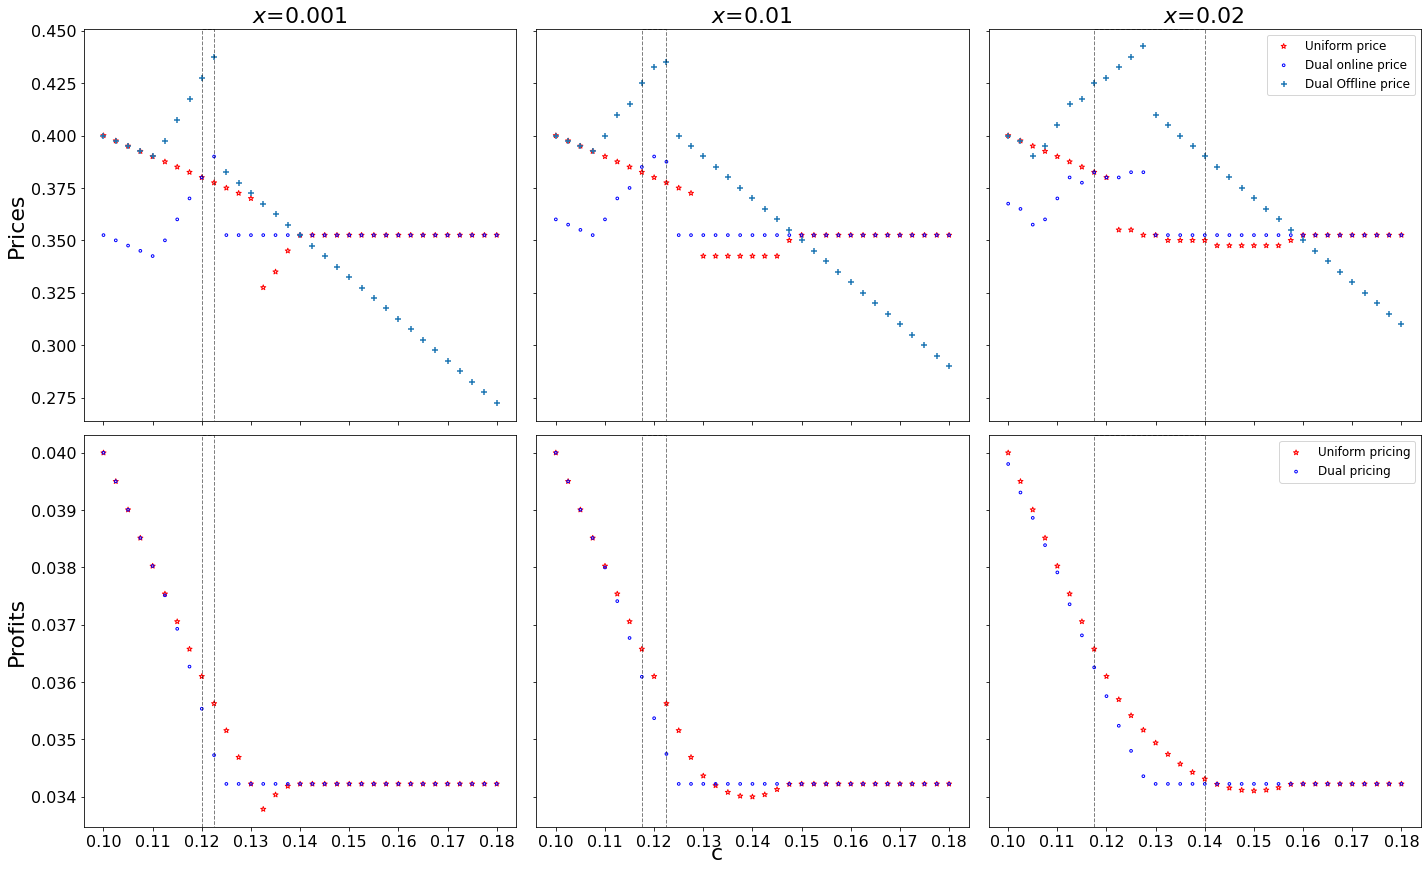

In [27]:
myfig = plot(data,xs=[0.001,0.01,0.02], fz=(20,12))

In [1]:
myfig.savefig(r"C:/Users/admin/Desktop/managing multi-rooming/round 3/HetergenousOnlineCosts.pdf")

NameError: name 'myfig' is not defined

In [ ]:
# def plot(data, vals, fz=(20,8)):
#     epsilon = 0.0000001
#     fig,axes = plt.subplots(2, len(data), sharex='col', sharey='row',figsize=fz)
#     fig.subplots_adjust(hspace=0.6, wspace=0.4)
#     for j,current_data  in enumerate(data):
#         sel_c = current_data["c"]
#         min_c_ind = min(sel_c)
#         max_c_ind = max(sel_c)
#         step = sel_c[1]-sel_c[0]

#         sel_prices_u = current_data["p_u"]
#         sel_prices_d_on =  current_data["pon"]
#         sel_prices_d_off =  current_data["poff"]
#         sel_profits_u = current_data["pi_u"]
#         sel_profits_d = current_data["pi_d"]
        
# #         HP_zone= (sel_profits_u > sel_profits_d)
# #         HP_c = sel_c[current_data[HP_zone].index]
        
#         HPLP_zone=(sel_prices_u-sel_prices_d_on <epsilon) & (sel_profits_u -sel_profits_d>epsilon)
#         HPLP_c = sel_c[current_data[HPLP_zone].index]
#         if not HPLP_c.empty:
#             HPLP_c_min = min(HPLP_c)
#             HPLP_c_max = max(HPLP_c)

#         axes[0,j].scatter(sel_c, sel_prices_u,  marker='*', s=28, facecolors='none', edgecolors='r',label="Uniform price")
#         axes[0,j].scatter(sel_c, sel_prices_d_on, marker=".",s=28,facecolors='none', edgecolors='b',label="Dual online price")
#         axes[0,j].scatter(sel_c, sel_prices_d_off, marker= "+", s=28, edgecolors='g',label="Dual Offline price")
        
#         if not HPLP_c.empty:
#             axes[0,j].axvspan(HPLP_c_min, HPLP_c_max, alpha=0.5, facecolor='none',edgecolor='black',linestyle='--')
        
#         if j==len(data)-1:
#             axes[0,j].legend(prop=dict(size=12), frameon=True)

#         #axes[0,j].set_xlabel("c", fontsize =16)

#         axes[0,j].set_title(r"$\delta_H$={} ".format(vals[j]), fontsize=22)
# #         axes[0,j].set_xlim((0.1,0.17))
# #         axes[0,j].set_ylim((0.28,0.46))
        
#         for label in (axes[0,j].get_xticklabels() + axes[0,j].get_yticklabels()):
#             label.set_fontsize(16)

# #         ax.scatter(c_test, piu_test, marker='*', s=12, facecolors='none', edgecolors='r',label="Uniform")
# #         ax.scatter(c_test, pid_test,marker=".",s=6,facecolors='none', edgecolors='b',label="Dual")
#         axes[1,j].scatter(sel_c, sel_profits_u, marker='*', s=28, facecolors='none', edgecolors='r',label="Uniform pricing")
#         axes[1,j].scatter(sel_c, sel_profits_d, marker=".",s=28,facecolors='none', edgecolors='b',label="Dual pricing")
#         if not HPLP_c.empty:
#             axes[1,j].axvspan(HPLP_c_min, HPLP_c_max, alpha=0.5, facecolor='none',edgecolor='black',linestyle='--')
        
#         if j==len(data) -1:
#             axes[1,j].legend(prop=dict(size=12), frameon=True)
# #         axes[1,j].set_ylim((0.03,0.042))
# #         axes[1,j].set_xlim((0.1,0.17))
        
#         for label in (axes[1,j].get_xticklabels() + axes[1,j].get_yticklabels()):
#             label.set_fontsize(16)
#     axes[0,0].set_ylabel("Prices", fontsize =22)
#     axes[1,0].set_ylabel("Profits", fontsize =22)
#     fig.text(0.5, 0, 'c', ha='center',fontsize =22)
#     fig.tight_layout()
#     return fig

## posted price

In [4]:
from tools_posted_dual import *
from posted_dual import posted_dual
import ray


In [5]:
def myround(num):
    num = num if abs(num) > EPSILON else 0
    return num


@ray.remote
def get_posted_dual_result(c, cr, s, h, step=0.01):
    posted_dual_ins = posted_dual(c=c, cr=cr, s=s, h=h, step=step)
    return posted_dual_ins.optimal_pon, posted_dual_ins.optimal_poff, posted_dual_ins.alpha_o, posted_dual_ins.alpha_so, posted_dual_ins.alpha_ss, posted_dual_ins.optimal_profit

In [9]:
def main(xs, filenames, step=0.0025, plot=False):
    for x, filename in zip(xs, filenames):
        p_list = []
        u_demand = []

        piu_list = []
        pon_list = []
        poff_list = []
        d_demand = []
        pid_list = []

        cr = 0.32
        s = 0.05 - x
        h = 0.05 + x
        sel_c = np.arange(0.1, 0.181, 0.0025)

        results_posted_dual_id = []

        for c in sel_c:
            results_posted_dual_id.append(get_posted_dual_result.remote(c=c, cr=cr, s=s, h=h, step=step))

        results_posted_dual = ray.get(results_posted_dual_id)

        for result_posted_dual in results_posted_dual:
            pon_list.append(result_posted_dual[0])
            poff_list.append(result_posted_dual[1])
            d_demand.append([result_posted_dual[2], result_posted_dual[3], result_posted_dual[4]])
            pid_list.append(result_posted_dual[5])


        cols = ["c", "pon", "poff", "on_demand_d", "show_demand_d", "off_demand_d", "pi_d"]
        data = np.array([sel_c,pon_list, poff_list, 
                         [k[0] for k in d_demand], [k[1] for k in d_demand],[k[2] for k in d_demand], pid_list]).T

        data_frame = pd.DataFrame(data=data, columns=cols)
        data_frame.to_excel(filename, index=False)

In [12]:
filenames = ["posted_output_x_1e-3.xlsx", "posted_output_x_1e-2.xlsx", "posted_output_x_2e-2.xlsx"]
xs = [0.001, 0.01, 0.02]
main(xs, filenames)

In [15]:
posted_data1 = pd.read_excel("posted_output_x_1e-3.xlsx",sheet_name=0)
posted_data2 = pd.read_excel("posted_output_x_1e-2.xlsx",sheet_name=0)
posted_data3 = pd.read_excel("posted_output_x_2e-2.xlsx",sheet_name=0)
posted_data = [posted_data1, posted_data2, posted_data3]

In [22]:
posted_data[1]

,c,pon,poff,on_demand_d,show_demand_d,off_demand_d,pi_d
0,0.1000,0.3600,0.4000,0.000000,0,0.400000,0.040000
1,0.1025,0.3575,0.3975,0.000000,0,0.397500,0.039502
2,0.1050,0.3550,0.3950,0.000000,0,0.395000,0.039006
3,0.1075,0.3525,0.3925,0.000000,0,0.392500,0.038514
4,0.1100,0.3550,0.3900,0.000000,0,0.390000,0.038025
5,0.1125,0.3550,0.3875,0.000000,0,0.387500,0.037539
6,0.1150,0.3575,0.3850,0.000000,0,0.385000,0.037056
7,0.1175,0.3600,0.3825,0.000000,0,0.382500,0.036577
8,0.1200,0.3600,0.3800,0.000000,0,0.380000,0.036100
9,0.1225,0.3575,0.3775,0.059473,0,0.318516,0.035654


In [62]:
def posted_plot(data, posted_data, vals, fz=(20,8)):
    epsilon = 0.0000001
    fig,axes = plt.subplots(2, len(data), sharex='col', sharey='row',figsize=fz)
    fig.subplots_adjust(hspace=0.6, wspace=0.4)
    for j,(current_data, current_posted_data)  in enumerate(zip(data, posted_data)):
        sel_c = current_data["c"]
        min_c_ind = min(sel_c)
        max_c_ind = max(sel_c)
        step = sel_c[1]-sel_c[0]

        sel_prices_u = current_data["p_u"]
        sel_prices_d_on =  current_data["pon"]
        sel_prices_d_off =  current_data["poff"]
        sel_posted_prices_d_on =  current_posted_data["pon"]
        sel_posted_prices_d_off =  current_posted_data["poff"]
        
        sel_profits_u = current_data["pi_u"]
        sel_profits_d = current_data["pi_d"]
        sel_posted_profits_d = current_posted_data["pi_d"]
        
#         HP_zone= (sel_profits_u > sel_profits_d)
#         HP_c = sel_c[current_data[HP_zone].index]
        
        HPLP_zone=(sel_prices_u-sel_prices_d_on <epsilon) & (sel_profits_u -sel_profits_d>epsilon)
        HPLP_c = sel_c[current_data[HPLP_zone].index]
        if not HPLP_c.empty:
            HPLP_c_min = min(HPLP_c)
            HPLP_c_max = max(HPLP_c)

        axes[0,j].scatter(sel_c, sel_prices_u,  marker='*', s=50, facecolors='none', edgecolors='r',label="Uniform price")
        axes[0,j].scatter(sel_c, sel_prices_d_on, marker=".",s=50,facecolors='none', edgecolors='b',label="Dual online price")
        axes[0,j].scatter(sel_c, sel_prices_d_off, marker= "+", s=50, c='b',label="Dual offline price")
        
        axes[0,j].scatter(sel_c, sel_posted_prices_d_on, marker=">",s=50,facecolors='none', edgecolors='k',label="Posted dual online price")
        axes[0,j].scatter(sel_c, sel_posted_prices_d_off, marker= "D", s=50, facecolors='none', edgecolors='k',label="Posted dual offline price")
        
        
        
        if not HPLP_c.empty:
            axes[0,j].axvspan(HPLP_c_min, HPLP_c_max, alpha=0.5, facecolor='none',edgecolor='black',linestyle='--')
        
        if j==len(data)-1:
            axes[0,j].legend(prop=dict(size=12), frameon=True)

        #axes[0,j].set_xlabel("c", fontsize =16)

        axes[0,j].set_title(r"$\delta_H$={} ".format(vals[j]), fontsize=22)
#         axes[0,j].set_xlim((0.1,0.17))
#         axes[0,j].set_ylim((0.28,0.46))
        
        for label in (axes[0,j].get_xticklabels() + axes[0,j].get_yticklabels()):
            label.set_fontsize(16)

#         ax.scatter(c_test, piu_test, marker='*', s=12, facecolors='none', edgecolors='r',label="Uniform")
#         ax.scatter(c_test, pid_test,marker=".",s=6,facecolors='none', edgecolors='b',label="Dual")

        axes[1,j].scatter(sel_c, sel_profits_u, marker='*', s=50, facecolors='none', edgecolors='r',label="Uniform pricing")
        axes[1,j].scatter(sel_c, sel_profits_d, marker=".",s=50,facecolors='none', edgecolors='b',label="Dual pricing")
        
        axes[1,j].scatter(sel_c, sel_posted_profits_d, marker=">",s=50,  facecolors='none', edgecolors='k',label="Posted dual pricing")
        if not HPLP_c.empty:
            axes[1,j].axvspan(HPLP_c_min, HPLP_c_max, alpha=0.5, facecolor='none',edgecolor='black',linestyle='--')
        
        if j==len(data) -1:
            axes[1,j].legend(prop=dict(size=12), frameon=True)
#         axes[1,j].set_ylim((0.03,0.042))
#         axes[1,j].set_xlim((0.1,0.17))
        
        for label in (axes[1,j].get_xticklabels() + axes[1,j].get_yticklabels()):
            label.set_fontsize(16)
    axes[0,0].set_ylabel("Prices", fontsize =22)
    axes[1,0].set_ylabel("Profits", fontsize =22)
    fig.text(0.5, 0, 'c', ha='center',fontsize =22)
    fig.tight_layout()
    return fig

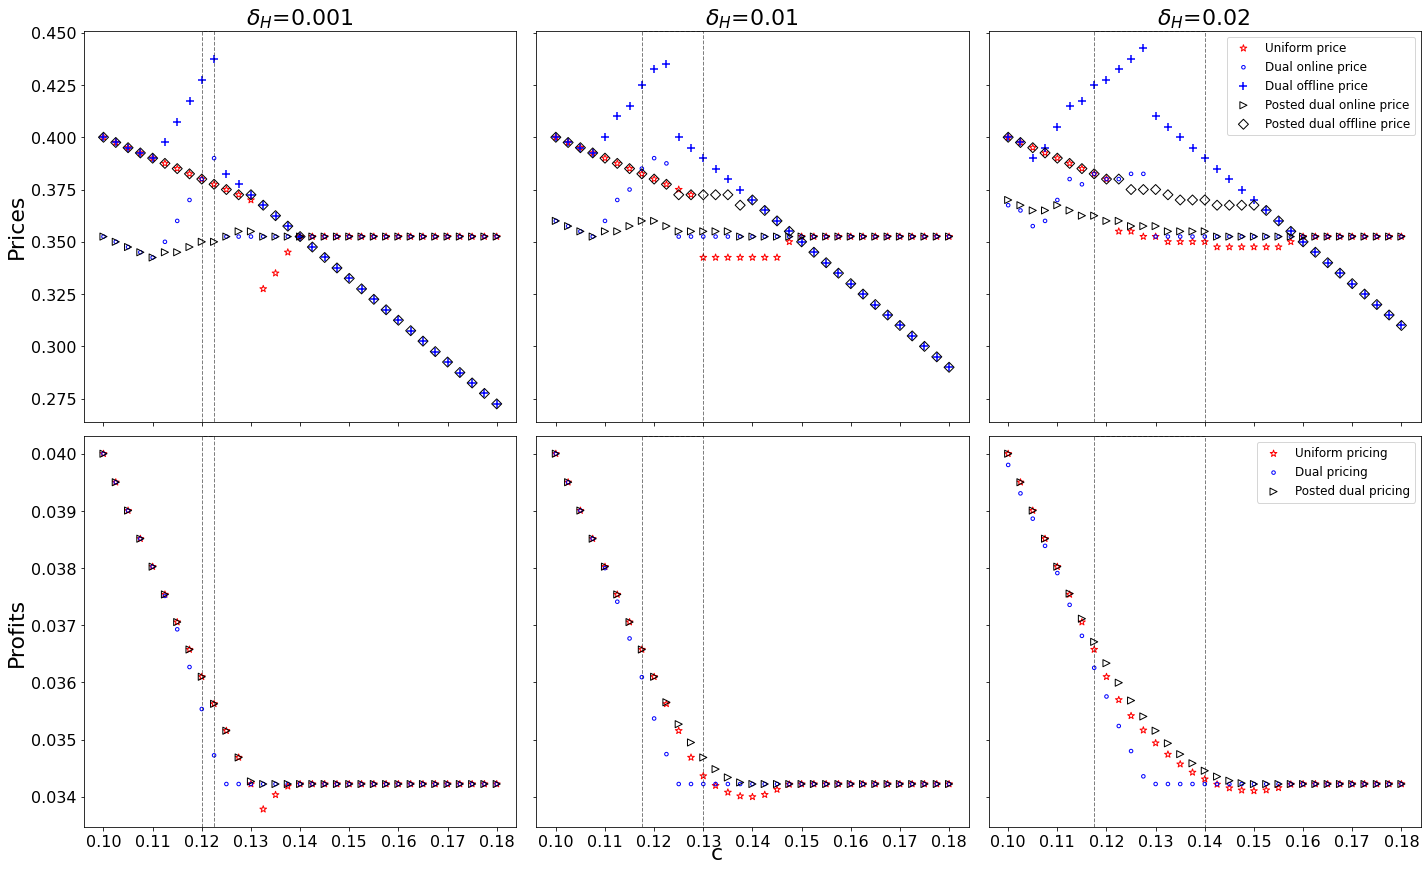

In [63]:
myfig = posted_plot(data, posted_data,vals=[0.001,0.01,0.02], fz=(20,12))